# Wine Dataset for Clustering
## Cluster wines based on their chemical constituents

This dataset is adapted from the Wine Data Set from https://archive.ics.uci.edu/ml/datasets/wine by removing the information about the types of wine for unsupervised learning.

The following descriptions are adapted from the UCI webpage:

These data are the results of a chemical analysis of wines grown in the same region in Italy but derived from three different cultivars. The analysis determined the quantities of 13 constituents found in each of the three types of wines.

The attributes are:

* Alcohol
* Malic acid
* Ash
* Alcalinity of ash
* Magnesium
* Total phenols
* Flavanoids
* Nonflavanoid phenols
* Proanthocyanins
* Color intensity
* Hue
* OD280/OD315 of diluted wines
* Proline


In [1]:
import pandas as pd
data = pd.read_csv('wine/wine-clustering.csv')
data

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [2]:
import matplotlib.pyplot as plt
import pandas as pd
# from pandas.tools.plotting import parallel_coordinates

from sklearn.decomposition import PCA as sklearnPCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
# from sklearn.datasets.samples_generator import make_blobs
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [3]:
scaler = StandardScaler()
data_norm = scaler.fit_transform(data)

In [4]:
data_transformed = pd.DataFrame(data_norm)
data_transformed

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,0.876275,2.974543,0.305159,0.301803,-0.332922,-0.985614,-1.424900,1.274310,-0.930179,1.142811,-1.392758,-1.231206,-0.021952
174,0.493343,1.412609,0.414820,1.052516,0.158572,-0.793334,-1.284344,0.549108,-0.316950,0.969783,-1.129518,-1.485445,0.009893
175,0.332758,1.744744,-0.389355,0.151661,1.422412,-1.129824,-1.344582,0.549108,-0.422075,2.224236,-1.612125,-1.485445,0.280575
176,0.209232,0.227694,0.012732,0.151661,1.422412,-1.033684,-1.354622,1.354888,-0.229346,1.834923,-1.568252,-1.400699,0.296498


In [5]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3)
kmeans.fit(data_transformed)
y_kmeans = kmeans.predict(data_transformed)

In [6]:
y = y_kmeans
y

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

In [7]:
pca = sklearnPCA(n_components=2) #2-dimensional PCA
pca_transformed = pd.DataFrame(pca.fit_transform(data_transformed))
pca_transformed

,0,1
0,3.316751,-1.443463
1,2.209465,0.333393
2,2.516740,-1.031151
3,3.757066,-2.756372
4,1.008908,-0.869831
...,...,...
173,-3.370524,-2.216289
174,-2.601956,-1.757229
175,-2.677839,-2.760899
176,-2.387017,-2.297347


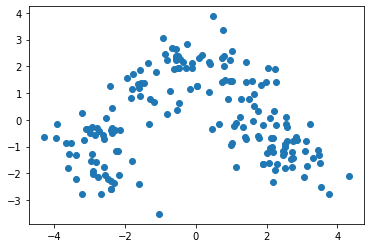

In [8]:
plt.scatter(pca_transformed[0], pca_transformed[1])
plt.show()

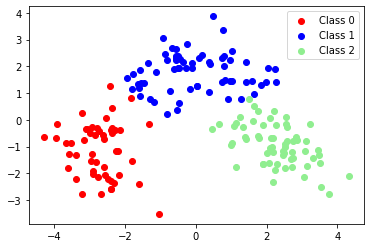

In [9]:
plt.scatter(pca_transformed[y==0][0], pca_transformed[y==0][1], label='Class 0', c='red')
plt.scatter(pca_transformed[y==1][0], pca_transformed[y==1][1], label='Class 1', c='blue')
plt.scatter(pca_transformed[y==2][0], pca_transformed[y==2][1], label='Class 2', c='lightgreen')

plt.legend()
plt.show()

In [10]:
lda = LDA(n_components=2) #2-dimensional LDA
lda_transformed = pd.DataFrame(lda.fit_transform(data_transformed, y))

In [11]:
lda_transformed

,0,1
0,5.433902,1.907336
1,4.129536,0.658333
2,3.958069,1.016650
3,4.959331,3.562156
4,2.005299,0.688873
...,...,...
173,-4.818961,3.111630
174,-4.630028,1.986794
175,-5.003111,3.404773
176,-4.218958,2.717397


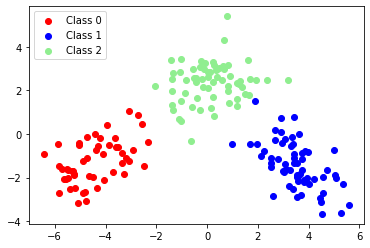

In [19]:
plt.scatter(lda_transformed[y==0][0], lda_transformed[y==0][1], label='Class 0', c='red')
plt.scatter(lda_transformed[y==1][0], lda_transformed[y==1][1], label='Class 1', c='blue')
plt.scatter(lda_transformed[y==2][0], lda_transformed[y==2][1], label='Class 2', c='lightgreen')

# Display legend and show plot
plt.legend(loc=2)
plt.show()


In [36]:
from sklearn.mixture import GaussianMixture as GMM
gmm = GMM(n_components=3).fit(pca_transformed)
labels = gmm.predict(pca_transformed)

In [37]:
gmm

GaussianMixture(n_components=3)

In [38]:
y=labels
y

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=int64)

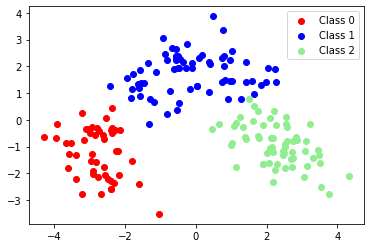

In [39]:
plt.scatter(pca_transformed[y==0][0], pca_transformed[y==0][1], label='Class 0', c='red')
plt.scatter(pca_transformed[y==1][0], pca_transformed[y==1][1], label='Class 1', c='blue')
plt.scatter(pca_transformed[y==2][0], pca_transformed[y==2][1], label='Class 2', c='lightgreen')

plt.legend()
plt.show()

In [40]:
lda = LDA(n_components=2) #2-dimensional LDA
lda_transformed = pd.DataFrame(lda.fit_transform(data_transformed, labels))


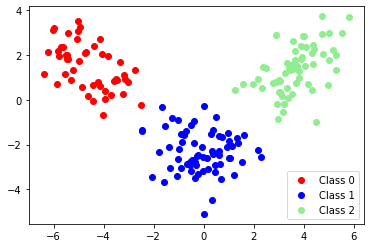

In [48]:
plt.scatter(lda_transformed[y==0][0], lda_transformed[y==0][1], label='Class 0', c='red')
plt.scatter(lda_transformed[y==1][0], lda_transformed[y==1][1], label='Class 1', c='blue')
plt.scatter(lda_transformed[y==2][0], lda_transformed[y==2][1], label='Class 2', c='lightgreen')

# Display legend and show plot
plt.legend(loc=4)
plt.show()


Looks like with k-means appy on the original data, its pretty easy to cluster the data.

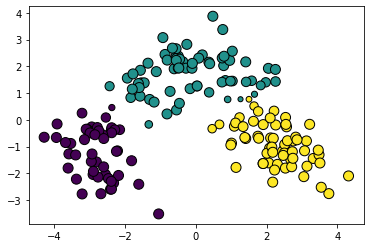

In [47]:
#using pca_transformed data, which has a lot of overlapping, 
probs = gmm.predict_proba(pca_transformed)
size = 100 * probs.max(axis=1) ** 2 
plt.scatter(pca_transformed[0], pca_transformed[1], c=labels, s=size, cmap='viridis', edgecolor='k');